# Part 1

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import pandas as pd

(a) 

In [3]:
def CreateD(A):
    D = np.zeros(A.shape)
    for i in range(A.shape[0]):
        D[i][i] = np.sum(A[i])
    return D
       
def CreateL(A):
    D = CreateD(A)
    return D - A

def CreateA1(n = 6):
    A = np.zeros((n,n))
    for i in range(n-1):
        A[i][i+1], A[i+1][i] = 1, 1
    return A

def CreateA2(n = 6):
    A = np.zeros((n,n))
    for i in range(n-1):
        A[i][i+1], A[i+1][i] = 1, 1
        A[i][n-1], A[n-1][i] = 1, 1
    return A

def CreateA3(n = 6):
    A = np.zeros((n,n))
    for i in range(0,n-1):
        A[i][i+1], A[i+1][i] = 1, 1
        A[i][i-1], A[i-1][i] = 1, 1
    return A

def CreateA4(n = 6):
    A = np.zeros((n,n))
    for i in range(0,n-1):
        A[i][i+1], A[i+1][i] = 1, 1
        A[i][i-1], A[i-1][i] = 1, 1
        A[i][n-1], A[n-1][i] = 1, 1
    A[0][n-2], A[n-2][0] = 1, 1
    return A

In [3]:
CreateL(CreateA1())

array([[ 1., -1.,  0.,  0.,  0.,  0.],
       [-1.,  2., -1.,  0.,  0.,  0.],
       [ 0., -1.,  2., -1.,  0.,  0.],
       [ 0.,  0., -1.,  2., -1.,  0.],
       [ 0.,  0.,  0., -1.,  2., -1.],
       [ 0.,  0.,  0.,  0., -1.,  1.]])

In [4]:
CreateL(CreateA2())

array([[ 2., -1.,  0.,  0.,  0., -1.],
       [-1.,  3., -1.,  0.,  0., -1.],
       [ 0., -1.,  3., -1.,  0., -1.],
       [ 0.,  0., -1.,  3., -1., -1.],
       [ 0.,  0.,  0., -1.,  2., -1.],
       [-1., -1., -1., -1., -1.,  5.]])

In [5]:
CreateL(CreateA3())

array([[ 2., -1.,  0.,  0.,  0., -1.],
       [-1.,  2., -1.,  0.,  0.,  0.],
       [ 0., -1.,  2., -1.,  0.,  0.],
       [ 0.,  0., -1.,  2., -1.,  0.],
       [ 0.,  0.,  0., -1.,  2., -1.],
       [-1.,  0.,  0.,  0., -1.,  2.]])

In [6]:
CreateL(CreateA4())

array([[ 3., -1.,  0.,  0., -1., -1.],
       [-1.,  3., -1.,  0.,  0., -1.],
       [ 0., -1.,  3., -1.,  0., -1.],
       [ 0.,  0., -1.,  3., -1., -1.],
       [-1.,  0.,  0., -1.,  3., -1.],
       [-1., -1., -1., -1., -1.,  5.]])

(b)

In [7]:
A = [CreateA1(100), CreateA2(100),CreateA3(100),CreateA4(100)]
L = [CreateL(a) for a in A]

In [14]:
# the matrix should be symmetric
# index should be a single number, start from 1
def GetEigen(matrix, index, largest=True):
    value, vector = np.linalg.eigh(matrix)
    order_value, order_index = torch.topk(torch.tensor(value), index, largest = largest)
    return order_value[index-1].numpy(), vector[:,order_index[index-1]]

# get eigenvalues and eigenvectors in a list index
# index will order from largest to smallest
def GetEigens(matrix, indexs):
    values, vectors = [], []
    for index in indexs:
        value, vector = GetEigen(matrix, int(np.abs(index)), index > 0)
        values.append(value)
        vectors.append(vector)
    return np.array(values), np.array(vectors)

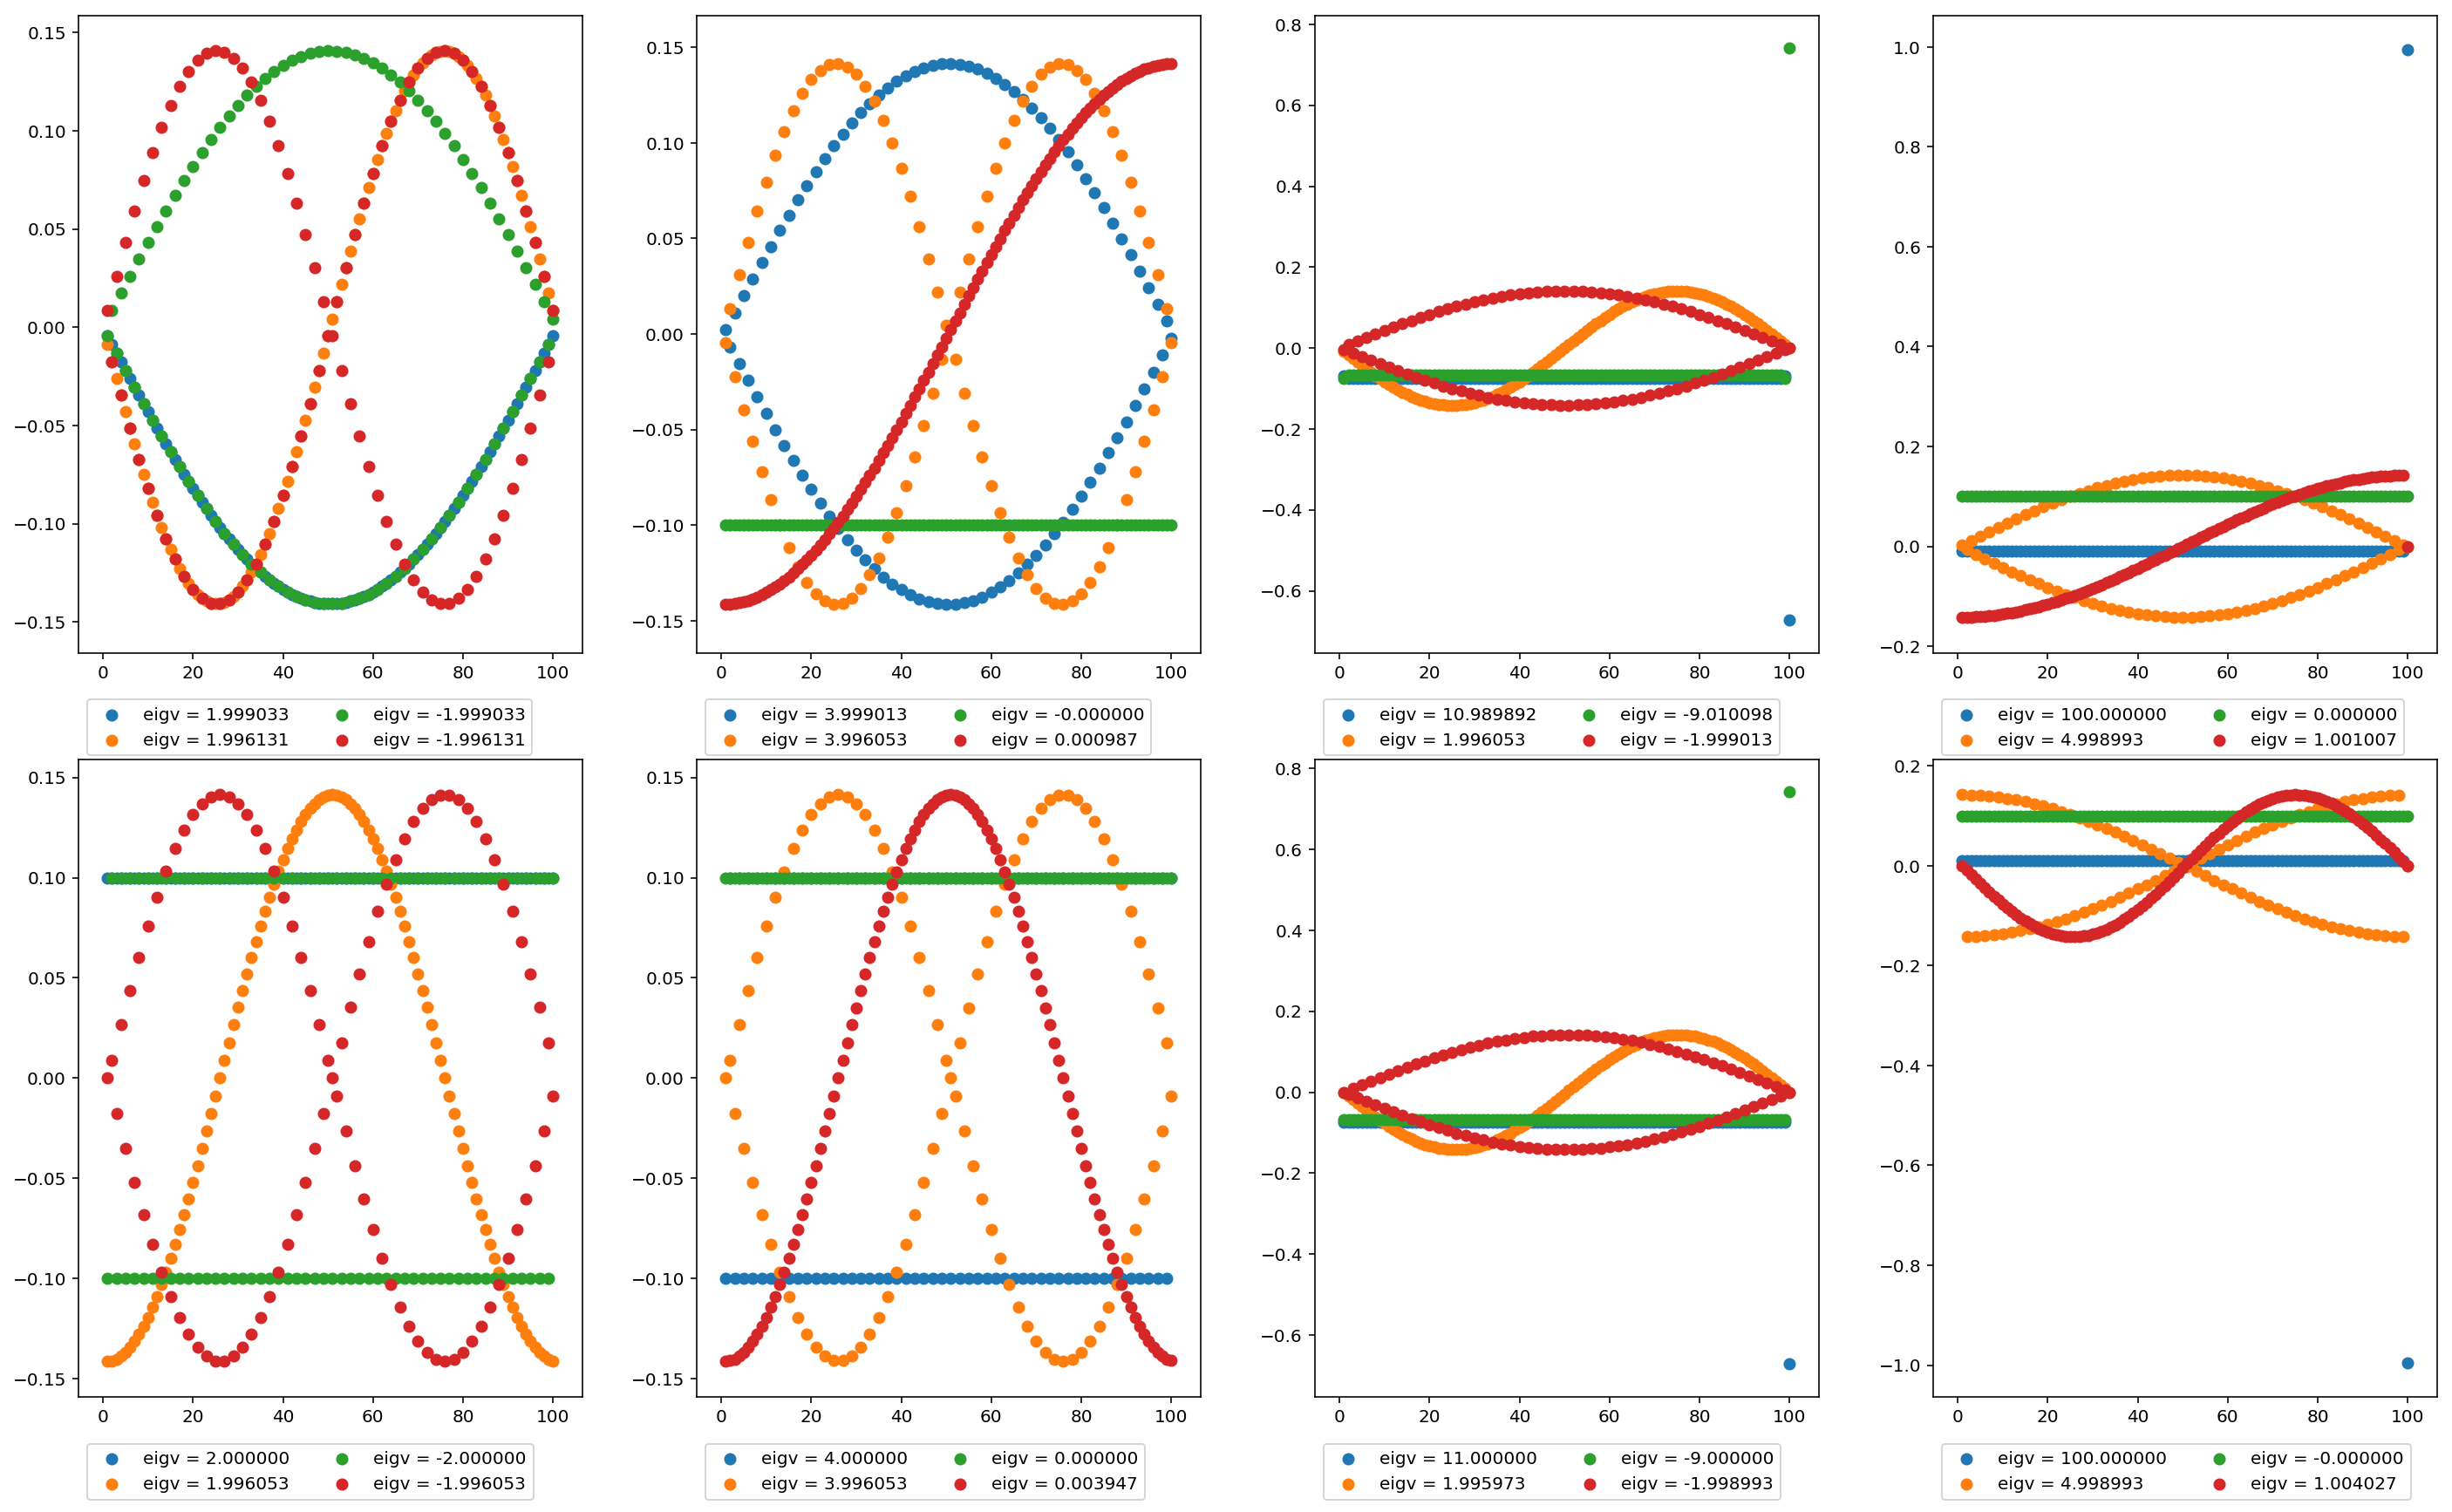

In [9]:
plt.figure(figsize=[20,12])
for i in range(4):
    plt.subplot(2,4,i*2+1)
    values, vectors = GetEigens(A[i], [1,2,-1,-2])
    for vector in vectors:
        plt.scatter(np.arange(1,len(vector)+1), vector)
    plt.legend(['eigv = %6f' %value for value in values],\
               bbox_to_anchor=(0,-0.175),loc = 3, ncol = 2)
    
    plt.subplot(2,4,i*2+2)
    values, vectors = GetEigens(L[i], [1,2,-1,-2])
    for vector in vectors:
        plt.scatter(np.arange(1, len(vector)+1), vector)
    plt.legend(['eigv = %6f' %value for value in values],\
               bbox_to_anchor=(0,-0.175),loc = 3, ncol = 2)

plt.tight_layout()
plt.show();

Since all eigenvectors are orthgonal, we can see that eigenvectors in the same graph are the discrete form of trigonometric function. The laplacian matrice have one and only one eigenvalue that is zero since all of these four graphs have only one connected component. Because eigenvector with eigenvalue zero are constant on each connected component, we can see that laplacian matrix must have a horizontal line.

(C)

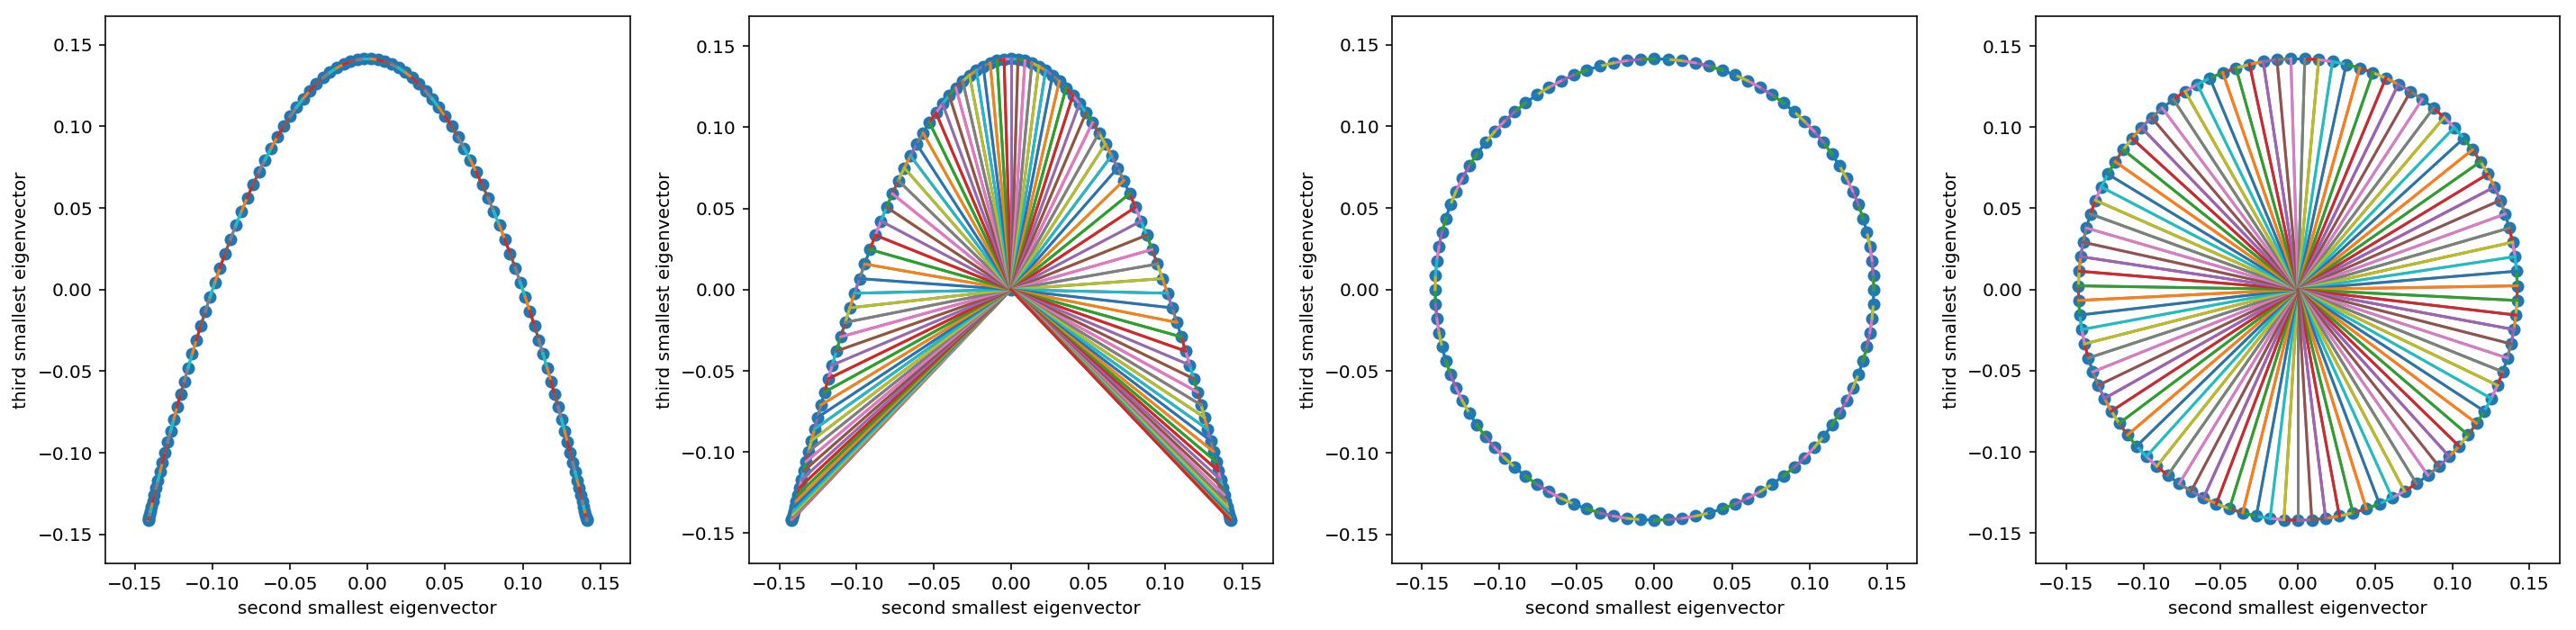

In [10]:
plt.figure(figsize=[20,5])
for i in range(4):
    values, vectors = GetEigens(L[i], [-2,-3])
    plt.subplot(1,4,i+1)
    plt.scatter(vectors[0], vectors[1])
    plt.xlabel('second smallest eigenvector')
    plt.ylabel('third smallest eigenvector')
    for m in range(A[i].shape[0]):
        for n in range(A[i].shape[1]):
            if A[i][m][n] == 1:
                plt.plot((vectors[0][m], vectors[0][n]),(vectors[1][m], vectors[1][n]))

plt.tight_layout()
plt.show();

(d)

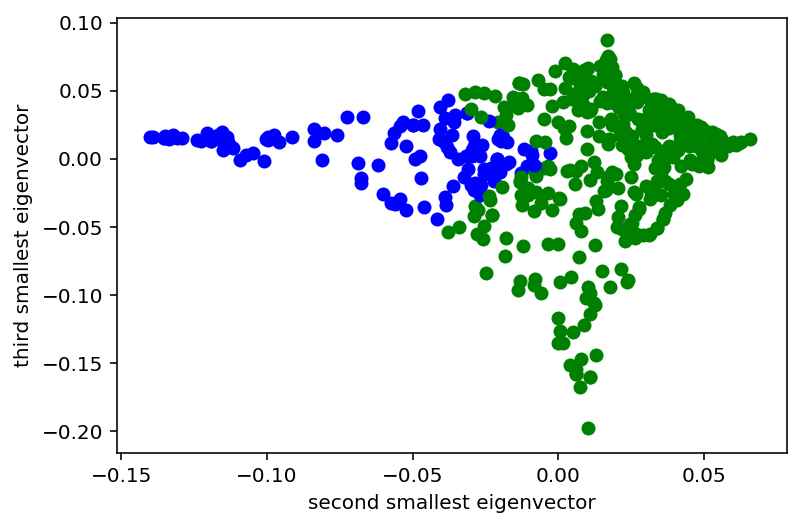

In [11]:
x = np.random.uniform(low = 0, high = 1, size = (500))
y = np.random.uniform(low = 0, high = 1, size = (500))

A = np.zeros((len(x), len(x)))
for m in range(len(x)):
    for n in range(len(x)):
        if (x[m] - x[n])**2 + (y[m] - y[n])**2 < 1/16:
            A[m][n] = A[n][m] = 1
L = CreateL(A)

values, vectors = GetEigens(L, [-2,-3])
for i in range(len(x)):
    if x[i] < 1/2 and y[i] < 1/2:
        plt.scatter(vectors[0][i], vectors[1][i], c = 'b')
    else:
        plt.scatter(vectors[0][i], vectors[1][i], c = 'g')

plt.xlabel('second smallest eigenvector')
plt.ylabel('third smallest eigenvector')
plt.show();

These blue points clustered together in the embedding. why?????????????????????

# Part 2

(a)

In [12]:
data = pd.read_csv('cs168mp6.csv')
data.head()

,1,10
0,1,1002
1,1,1010
2,1,104
3,1,1042
4,1,1074


(b)

In [16]:
max_num = np.max(data.values)
A = np.zeros((max_num, max_num))
# since we start from zero, we need to minus one
# when create A matrix
for index, row in data.iterrows():
    A[row[0]-1][row[1]-1] = A[row[1]-1][row[0]-1] = 1
L = CreateL(A)

In [14]:
values, vectors = GetEigens(L, list(range(-1,-13,-1)))

In [15]:
print(values)

[-1.45476992e-14 -1.55264250e-15  4.17067011e-16  2.39415383e-15
  1.31682121e-14  2.69873867e-14  1.43040166e-02  5.37956527e-02
  7.39029767e-02  8.12896697e-02  1.20223932e-01  1.32838867e-01]


(c)

Since L has 6 eigenvalues that less than 1e-12, there are six connected components.

First, we try to use the smallest 2 eigenvalues' corresponding eigenvectors to show the embedding of the graph:

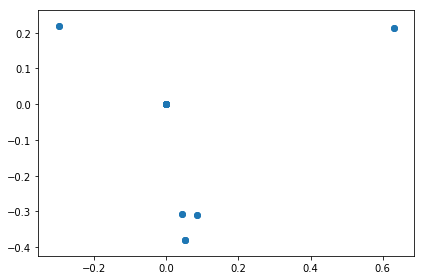

[1484, 2, 3, 2, 2, 2]
dict_keys([(0.0, 0.0), (4.0, -30.0), (5.0, -37.0), (-29.0, 21.0), (8.0, -31.0), (63.0, 21.0)])
6
-------------------
(4.0, -30.0)
306 [[1023]]
1023 [[306]]
-------------------
(5.0, -37.0)
320 [[431]]
431 [[ 320]
 [1086]]
1086 [[431]]
-------------------
(-29.0, 21.0)
521 [[1189]]
1189 [[521]]
-------------------
(8.0, -31.0)
571 [[685]]
685 [[571]]
-------------------
(63.0, 21.0)
615 [[821]]
821 [[615]]


In [224]:
# plt.figure(figsize=[10,10])

values, vectors = GetEigens(L, [-1, -2])
plt.scatter(vectors[0], vectors[1])

plt.tight_layout()
plt.show();

component_dict = {}
for i in range(len(vectors[0])):
    if (np.fix(vectors[0][i]*100), np.fix(vectors[1][i]*100)) not in component_dict.keys():
        component_dict[(np.fix(vectors[0][i]*100), np.fix(vectors[1][i]*100))] = [i]
    else:
        component_dict[(np.fix(vectors[0][i]*100), np.fix(vectors[1][i]*100))].append(i)
        
print([len(component_dict[key]) for key in component_dict.keys()])
print(component_dict.keys())
print(len(component_dict))

for k in component_dict.keys():
    if (k == (0.0, -0.0)):
        continue
    print("-------------------")
    print(k)
    for node in component_dict[k]:
        print(node, np.argwhere(A[node]==1))

We can see that the nodes are seperated into 6 components with the 2 eigenvectors, and show them above except the largest major component. We can see that it actually seperated the components.

Now we try larger eigenvectors.

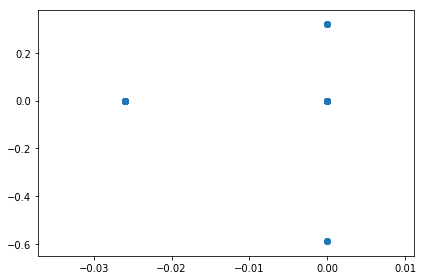

[1484, 2, 3, 6]
dict_keys([(-2.0, -0.0), (0.0, -58.0), (-0.0, 31.0), (-0.0, 0.0)])
4
-------------------
(0.0, -58.0)
306 [[1023]]
1023 [[306]]
-------------------
(-0.0, 31.0)
320 [[431]]
431 [[ 320]
 [1086]]
1086 [[431]]
-------------------
(-0.0, 0.0)
521 [[1189]]
571 [[685]]
615 [[821]]
685 [[571]]
821 [[615]]
1189 [[521]]


In [97]:
# plt.figure(figsize=[10,10])

values, vectors = GetEigens(L, [-4, -5])
plt.scatter(vectors[0], vectors[1])

plt.tight_layout()
plt.show();

component_dict = {}
for i in range(len(vectors[0])):
    if (np.fix(vectors[0][i]*100), np.fix(vectors[1][i]*100)) not in component_dict.keys():
        component_dict[(np.fix(vectors[0][i]*100), np.fix(vectors[1][i]*100))] = [i]
    else:
        component_dict[(np.fix(vectors[0][i]*100), np.fix(vectors[1][i]*100))].append(i)
        
print([len(component_dict[key]) for key in component_dict.keys()])
print(component_dict.keys())
print(len(component_dict))

for k in component_dict.keys():
    if (k == (-2.0, 0.0)):
        continue
    print("-------------------")
    print(k)
    for node in component_dict[k]:
        print(node, np.argwhere(A[node]==1))

We try to use the $4^{th}$ and $5^{th}$ smallest eigenvalues' corresponding eigenvector to seperate the components, and get only 4 components. As the output, we can see that the last components actually includes 3 different components, so we cannot use the larger eigenvalues' corresonding eigenvector. Using the smallest 2 eigenvectors can seperate the nodes into 6 correct components.

d)

In [263]:
def get_cond(A, S, V):
    VS = np.setdiff1d(V,S)
    AS = np.sum(A[S]) + np.sum(A[:, S])
    AVS = np.sum(A[VS]) + np.sum(A[:, VS])
    SUM = np.sum(A[VS][:,S]) + np.sum(A[S][:,VS])
    return SUM/min(AS, AVS)
V = np.arange(max_num)

[497, 181, 61, 50, 356, 34, 50, 2, 90, 1, 15, 2, 10, 1, 7, 15, 5, 6, 4, 2, 4, 12, 3, 3, 4, 1, 3, 12, 8, 3, 6, 4, 2, 1, 1, 6, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2]
Set with size  497 with the cond =  0.08319646599082517
(-0.0, 0.0)
Set with size  181 with the cond =  0.07573415765069552
(2.0, -0.0)
Set with size  356 with the cond =  0.0554312047399605
(-0.0, 4.0)


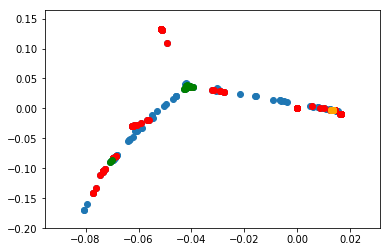

In [274]:
color_list = ['r', 'g', 'orange', 'cyan', 'black', 'chocolate']
color_index = 0
acc =300
values, vectors = GetEigens(L, [-20, -30])
component_dict = {}
for i in range(len(vectors[0])):
    if (np.fix(vectors[0][i]*acc), np.fix(vectors[1][i]*acc)) not in component_dict.keys():
        component_dict[(np.fix(vectors[0][i]*acc), np.fix(vectors[1][i]*acc))] = [i]
    else:
        component_dict[(np.fix(vectors[0][i]*acc), np.fix(vectors[1][i]*acc))].append(i)

print([len(component_dict[key]) for key in component_dict.keys()])

values, vectors = GetEigens(L, [-7,-8])
plt.scatter(vectors[0], vectors[1])

for k in component_dict.keys():
    if (len(component_dict[k]) < 150):
        continue
    print('Set with size ', len(component_dict[k]), end='')
    print(' with the cond = ', get_cond(A, np.array(component_dict[k]), V))
    print(k)
    for node in component_dict[k]:
        plt.scatter(vectors[0][node], vectors[1][node], color=color_list[color_index])
    color_index += 1

We try to sperate the nodes with eigenvectors again. There are two parameters to adjust to seperate the nodes into different sets, which are the eigenvalues' rank and the precision of number of eigenvectors, and we only take the sets with size larger than 150.

To seperate the sets into 3 sets which match the 2 conditions, we try some different parameters and get the 3 sets when we use the $20^{th}$ and the $30^{th}$ smallest eigenvalue coresponding eigenvectors, and the precision is $\frac{1}{300}$, which gets the sets with size of $497, 181 , 356$ and the conductances are $0.083, 0.075 , 0.055$. In this set partitioning, we get the 3 sets totally disjoint.

e)

In [221]:
RAND = np.random.randint(0,max_num,150)
print(RAND)
print(get_cond(A, RAND, V))

[ 999 1463 1331  581   54 1093  627  445 1290 1189 1293 1079  857  412
 1048  955 1033 1382  392  509  562  826  954 1440  725 1059  559  467
  959 1481 1475  767  141  494   49 1448  782  372  965 1441  581  432
 1303  479   40  594  838 1004  868  415 1267  938 1066  195  713  184
  622  139  288  442 1058  889  420 1252 1399  137 1078  872  581  497
 1094   96 1094  309  994 1092  335 1007  691 1233 1165  833 1309  586
  873  220 1037  912 1349 1257 1382  474 1280 1121  352  367 1448 1294
  696 1457 1392  192  121  227  706  618  892  871 1441  682  108  306
 1424  928  283 1175  216  573 1474 1179  111 1077  796  641  469  438
 1424  864 1336 1008  490  434  575 1093 1477  234 1328 1240 1231  323
   84  691  499  888  521 1175  994  478 1406  700]
0.8831021794508916


The conductances from the sets we found in (d) is much less than the random sets.